In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.optimizers import SGD
import PIL

### Building The Model

In [2]:
# Download the architecture of ResNet101 with ImageNet weights
base_model = ResNet101(include_top=False, weights='imagenet')
 
# Taking the output of the last convolution block in ResNet50
x = base_model.output
 
# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D()(x)
 
# Adding a fully connected layer having 1024 neurons
x = Dense(1024, activation='relu')(x)
 
# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either dog or cat
predictions = Dense(2, activation='softmax')(x)
 
# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)
 
# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False

In [3]:
# Compiling the model
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ['accuracy'])

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/CT_mix/train/',
                                                               image_size=(227, 227),
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/CT_mix/train/',
                                                             image_size=(227, 227),
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/CT_mix/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 3388 files belonging to 2 classes.
Using 2711 files for training.
Found 3388 files belonging to 2 classes.
Using 677 files for validation.
Found 542 files belonging to 2 classes.


In [5]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

Epoch 1/50
85/85 [==============================] - 41s 483ms/step - loss: 0.6452 - accuracy: 0.6197 - val_loss: 0.5811 - val_accuracy: 0.7061
Epoch 2/50
85/85 [==============================] - 39s 456ms/step - loss: 0.5431 - accuracy: 0.7348 - val_loss: 0.5350 - val_accuracy: 0.7371
Epoch 3/50
85/85 [==============================] - 39s 458ms/step - loss: 0.5021 - accuracy: 0.7658 - val_loss: 0.5070 - val_accuracy: 0.7489
Epoch 4/50
85/85 [==============================] - 39s 459ms/step - loss: 0.4761 - accuracy: 0.7827 - val_loss: 0.4969 - val_accuracy: 0.7637
Epoch 5/50
85/85 [==============================] - 39s 463ms/step - loss: 0.4567 - accuracy: 0.7997 - val_loss: 0.4861 - val_accuracy: 0.7637
Epoch 6/50
85/85 [==============================] - 39s 464ms/step - loss: 0.4401 - accuracy: 0.8122 - val_loss: 0.4573 - val_accuracy: 0.7888
Epoch 7/50
85/85 [==============================] - 39s 464ms/step - loss: 0.4280 - accuracy: 0.8189 - val_loss: 0.4666 - val_accuracy: 0.7755

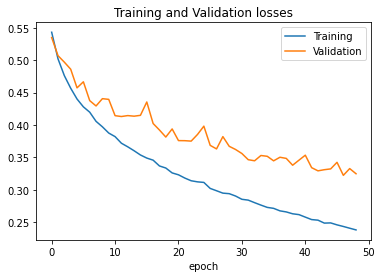

In [6]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("./Resnet_101_ct_mix.png")

In [7]:
# We will try to train the last stage of ResNet101
for layer in base_model.layers[0:143]:
  layer.trainable = False
 
for layer in base_model.layers[143:]:
  layer.trainable = True

In [8]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 15,
    validation_data = val_ds,
    verbose=1,
)

model.save("./Resnet_101_ct_mix")

Epoch 1/15
85/85 [==============================] - 39s 463ms/step - loss: 0.2361 - accuracy: 0.9185 - val_loss: 0.3284 - val_accuracy: 0.8464
Epoch 2/15
85/85 [==============================] - 40s 465ms/step - loss: 0.2348 - accuracy: 0.9214 - val_loss: 0.3249 - val_accuracy: 0.8508
Epoch 3/15
85/85 [==============================] - 39s 464ms/step - loss: 0.2322 - accuracy: 0.9200 - val_loss: 0.3190 - val_accuracy: 0.8567
Epoch 4/15
85/85 [==============================] - 40s 465ms/step - loss: 0.2294 - accuracy: 0.9233 - val_loss: 0.3328 - val_accuracy: 0.8479
Epoch 5/15
85/85 [==============================] - 40s 465ms/step - loss: 0.2267 - accuracy: 0.9240 - val_loss: 0.3171 - val_accuracy: 0.8552
Epoch 6/15
85/85 [==============================] - 40s 467ms/step - loss: 0.2258 - accuracy: 0.9284 - val_loss: 0.3105 - val_accuracy: 0.8597
Epoch 7/15
85/85 [==============================] - 40s 472ms/step - loss: 0.2240 - accuracy: 0.9270 - val_loss: 0.3086 - val_accuracy: 0.8626

In [9]:
model.evaluate(test_ds)

17/17 [==============================] - 6s 355ms/step - loss: 0.3763 - accuracy: 0.8487


[0.376295804977417, 0.8487085103988647]